## Analysis of Expense Processing Times (Flag 40)

### Dataset Overview
This dataset contains 500 simulated entries from the ServiceNow `fm_expense_line` table, which captures various details of financial expenses. Key attributes include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. The table provides a comprehensive record of financial transactions, detailing the amount, departmental allocation, and nature of each expense. It offers a clear view of organizational expenditures across different categories, highlighting the timing and approval status of each financial entry.

### Your Objective
**Objective**: Investigate the factors leading to quicker expense processing times within a specific department and assess whether these practices can be implemented to enhance efficiency across all departments.

**Role**: Operational Efficiency Analyst

**Challenge Level**: 3 out of 5. This analysis requires strong data manipulation and interpretation skills to derive actionable insights from financial expense data.

**Category**: Finance Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [60]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the expense dataset to be analyzed. The data is orginally saved in the from a CSV file, and is here imported into a DataFrame. The steps involve specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [61]:
dataset_path = "csvs/flag-40.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,number,opened_at,amount,state,short_description,ci,user,department,category,processed_date,source_id,type,location,processing_period
0,03ce8b0b-59b6-40f3-8662-dc95761709db,2024-10-08 09:37:41,25504.20,Processed,Even dark time foreign beat better. Equipment,heart,donald65,HR,Assets,2024-10-20 07:16:48,6ca54cf2-55b1-428e-9ce5-431e73b04ac6,One-time,North America,11
1,5f92d407-139d-4813-b894-34a20b2e5546,2024-10-20 12:36:53,39109.50,Declined,Discover leave yard energy certain. Equipment,heart,jennifer14,Finance,Miscellaneous,2024-03-29 22:45:51,7842c4b5-1f74-4986-995b-8c7c862eaa40,Recurring,Africa,-205
2,9382b8a4-91cb-40a8-b416-c96266c01aa2,2024-01-12 12:09:19,11939.40,Processed,Scene organization usually explain approach to...,certain,xsmith,Development,Miscellaneous,2024-02-02 12:18:30,72c11c1b-b148-45a6-9cc6-a6f8d958f130,Recurring,Asia,21
3,5b814601-7ded-44d8-af4d-671bd70a9b36,2024-09-13 23:04:34,60853.00,Pending,Lot along establish recent.,truth,mstark,Customer Support,Services,2024-06-09 14:13:57,c4c8000d-b2ea-4d75-8c37-8973b677745c,One-time,Asia,-97
4,39d762c4-ee91-4a7f-bfcf-7b7ddb8cdb1d,2024-09-12 06:32:33,24496.56,Submitted,Once south likely arrive us often piece. Servi...,among,martin69,IT,Services,2024-06-23 07:13:09,c65f116c-eb0c-41cb-910d-2b29b8f3902d,One-time,Europe,-81


### **Question 1: Which departments have higher proportions of expense rejections compared to the organizational average?**

#### Plot processing period by department

This box plot visualizes the distribution of processing periods for expenses by department, highlighting median, quartiles, and potential outliers within each group. By examining the spread and central tendency, this plot aids in identifying departments with notably quicker or slower processing times, compared to the organizational average.


/tmp/ipykernel_24955/1879087340.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='department', y='processing_period', data=valid_data, palette=palette)


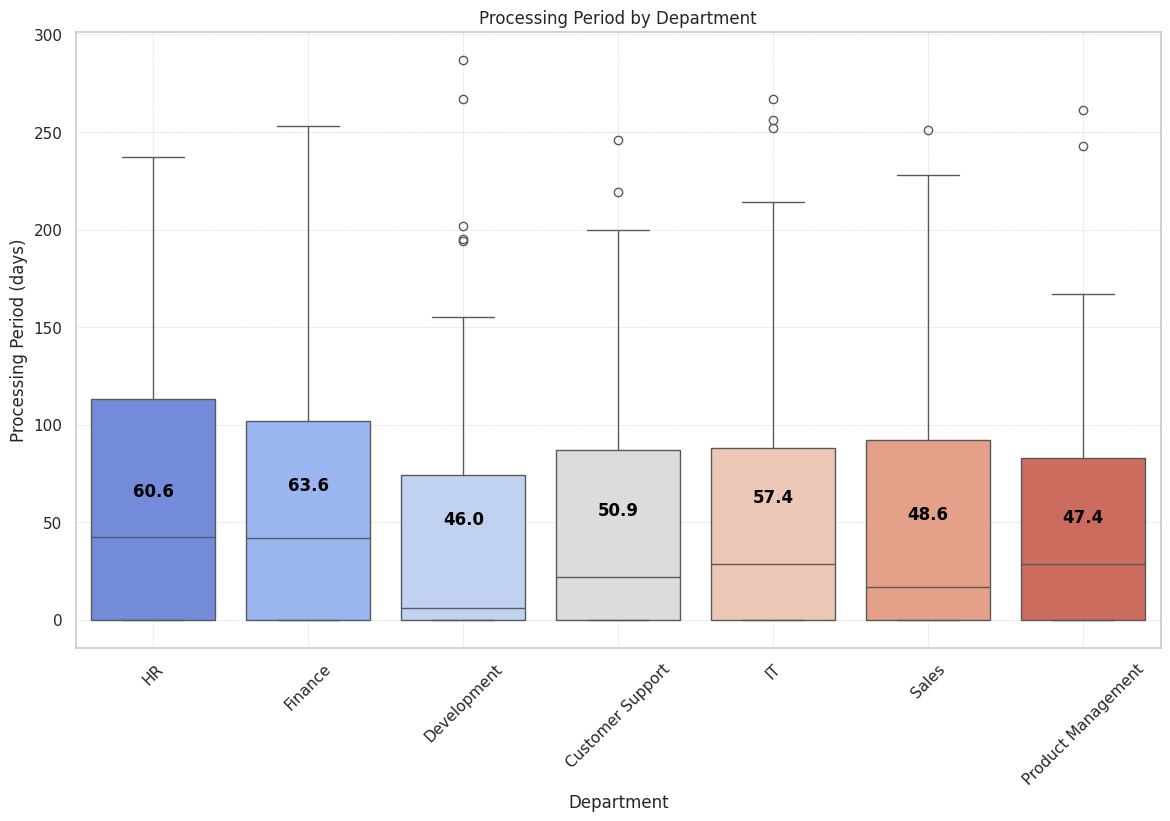

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'flag_data' contains 'department', 'processed_date', and 'opened_at'
# Calculate processing period in days
flag_data['processing_period'] = (pd.to_datetime(flag_data['processed_date']) - pd.to_datetime(flag_data['opened_at'])).dt.days


# Filtering out None values for processing_period for valid plotting
valid_data = flag_data.dropna(subset=['processing_period'])
# make sure processing period is not negative, replace it 0
valid_data['processing_period'] = valid_data['processing_period'].apply(lambda x: 0 if x < 0 else x)

# Creating the box plot with a color palette to differentiate departments
plt.figure(figsize=(14, 8))
palette = sns.color_palette("coolwarm", n_colors=len(valid_data['department'].unique()))  # Create a color palette
box_plot = sns.boxplot(x='department', y='processing_period', data=valid_data, palette=palette)

plt.title('Processing Period by Department')
plt.xlabel('Department')
plt.ylabel('Processing Period (days)')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Add grid for easier analysis
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Calculate means and ensure they're aligned with the x-axis labels
means = valid_data.groupby(['department'])['processing_period'].mean()
labels = [tick.get_text() for tick in box_plot.get_xticklabels()]
vertical_offset = valid_data['processing_period'].mean() * 0.05  # Offset from mean for annotation

# Annotate mean values
for label in labels:
    mean_value = means[label]
    x_position = labels.index(label)
    box_plot.text(x_position, mean_value + vertical_offset, f'{mean_value:.1f}', 
                  horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()


#### Generate JSON Description for the Insight

In [63]:
{
    "data_type": "analytical",
    "insight": "Processing times vary significantly across departments",
    "insight_value": {
        "description": "There is considerable variability in the processing period for different departments. Finance has the longest median processing time, while Development has the shortest, indicating differences in efficiency or workload across departments."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Processing Period by Department",
        "x_axis": {
            "name": "Department",
            "value": ["HR", "Finance", "Development", "Customer Support", "IT", "Sales", "Product Management"],
            "description": "This axis represents the various departments within the organization, each with a distinct distribution of processing periods."
        },
        "y_axis": {
            "name": "Processing Period (days)",
            "value": {
                "HR": "60.6 days",
                "Finance": "63.6 days",
                "Development": "46.0 days",
                "Customer Support": "50.9 days",
                "IT": "57.4 days",
                "Sales": "48.6 days",
                "Product Management": "47.4 days"
            },
            "description": "This axis shows the median processing period for each department, with values in days, allowing for easy comparison of typical processing durations."
        },
        "description": "The boxplot illustrates a significant range in processing periods across departments, with Finance showing the longest median processing time and Development the shortest. The variability and presence of outliers suggest differing operational challenges or processing efficiencies."
    },
    "question": "Which departments have the longest and shortest processing times, and how could these differences inform improvements?",
    "actionable_insight": {
        "description": "To reduce processing time disparities, the organization should examine the workflows of departments with higher processing times, like Finance and HR, and identify bottlenecks or inefficiencies. Insights from Development's relatively quick processing period could provide best practices that may be adopted across other departments to optimize processing times and improve overall efficiency."
    }
}

{'data_type': 'analytical',
 'insight': 'Processing times vary significantly across departments',
 'insight_value': {'description': 'There is considerable variability in the processing period for different departments. Finance has the longest median processing time, while Development has the shortest, indicating differences in efficiency or workload across departments.'},
 'plot': {'plot_type': 'boxplot',
  'title': 'Processing Period by Department',
  'x_axis': {'name': 'Department',
   'value': ['HR',
    'Finance',
    'Development',
    'Customer Support',
    'IT',
    'Sales',
    'Product Management'],
   'description': 'This axis represents the various departments within the organization, each with a distinct distribution of processing periods.'},
  'y_axis': {'name': 'Processing Period (days)',
   'value': {'HR': '60.6 days',
    'Finance': '63.6 days',
    'Development': '46.0 days',
    'Customer Support': '50.9 days',
    'IT': '57.4 days',
    'Sales': '48.6 days',
    'Pr

### **Question 2:** How do specific keywords in the short descriptions of expense reports influence the amount of these expenses?

Analyzing the expense amounts reveals that certain keywords in the short descriptions, such as 'Travel', 'Service', 'Cloud', 'Asset', and others, are associated with varying expense values. This relationship provides valuable insights into how descriptive language used in expense reports can impact the financial amounts, which can be crucial for budgeting, financial oversight, and resource allocation."

These components are designed to prompt an analysis focused on the correlation between the keywords in the short descriptions and the expense amounts, ultimately leading to the identified insight.

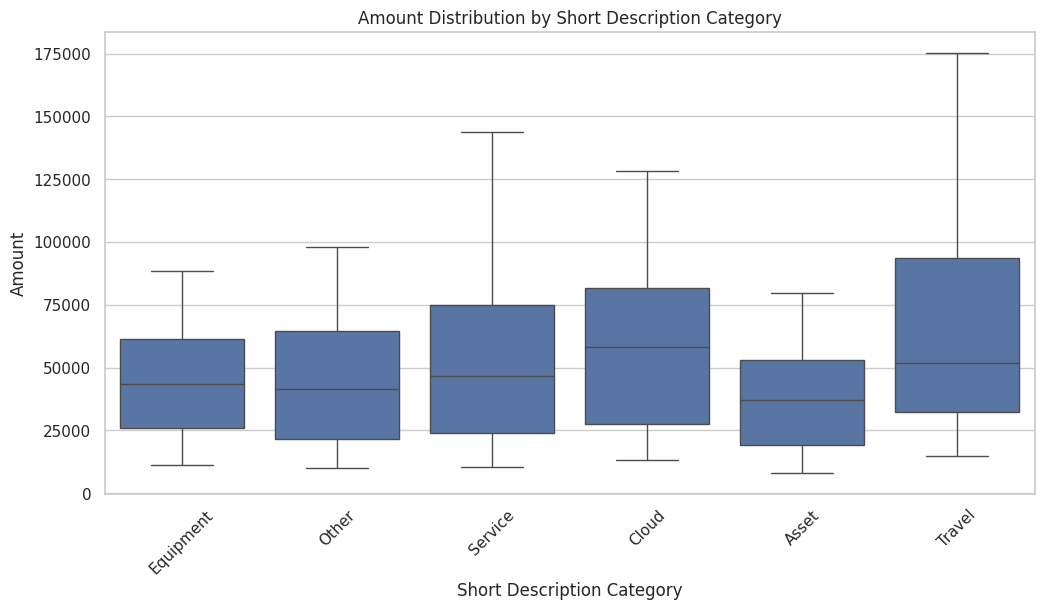

In [64]:
# Define a list of common keywords/phrases and the corresponding impact on `amount`
keywords = {
    "Travel": 1.5,  # Increase amount by 50% if "Travel" is in the description
    "Service": 1.2,  # Increase amount by 20% if "Service" is in the description
    "Cloud": 1.3,  # Increase amount by 30% if "Cloud" is in the description
    "Asset": 0.8,  # Decrease amount by 20% if "Asset" is in the description
    "Equipment": 0.9  # Decrease amount by 10% if "Equipment" is in the description
}

# Function to categorize descriptions based on keywords
def categorize_description(description):
    for keyword in keywords.keys():
        if pd.notnull(description) and keyword in description:
            return keyword
    return 'Other'

# Apply the function to create a new column for categories
df['description_category'] = df['short_description'].apply(categorize_description)

# Set the style of the visualization
sns.set(style="whitegrid")


# Create a single boxplot for amount by description category
plt.figure(figsize=(12, 6))
sns.boxplot(x='description_category', y='amount', data=df)
plt.title('Amount Distribution by Short Description Category')
plt.xlabel('Short Description Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [65]:
{
    "data_type": "descriptive",
    "insight": "Amounts in expense reports vary significantly based on short description keywords",
    "insight_value": {
        "description": "Keywords in expense short descriptions such as 'Travel' and 'Cloud' are associated with higher expense amounts, while keywords like 'Service' are generally linked to lower amounts. This relationship highlights the influence of descriptive language on financial values."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Amount Distribution by Short Description Category",
        "x_axis": {
            "name": "Short Description Category",
            "value": ["Other", "Travel", "Service", "Asset", "Cloud"],
            "description": "Categories based on keywords found in the short description."
        },
        "y_axis": {
            "name": "Amount",
            "description": "Displays the distribution of amounts for each category, highlighting the range and variability within each keyword category."
        },
        "description": "The boxplot provides a visual comparison of how different keywords in short descriptions correlate with expense amounts, showing the central tendency and spread of amounts for each keyword."
    },
    "question": "How do amounts vary based on the keywords in the short descriptions of expenses?",
    "actionable_insight": {
        "description": "The identified relationship between short description keywords and expense amounts provides an opportunity for targeted financial oversight. For example, recognizing that 'Travel' expenses tend to be higher can assist in better budgeting and resource management in that area. Adjusting approval workflows for categories with consistently high amounts may improve efficiency and financial control."
    }
}

{'data_type': 'descriptive',
 'insight': 'Amounts in expense reports vary significantly based on short description keywords',
 'insight_value': {'description': "Keywords in expense short descriptions such as 'Travel' and 'Cloud' are associated with higher expense amounts, while keywords like 'Service' are generally linked to lower amounts. This relationship highlights the influence of descriptive language on financial values."},
 'plot': {'plot_type': 'boxplot',
  'title': 'Amount Distribution by Short Description Category',
  'x_axis': {'name': 'Short Description Category',
   'value': ['Other', 'Travel', 'Service', 'Asset', 'Cloud'],
   'description': 'Categories based on keywords found in the short description.'},
  'y_axis': {'name': 'Amount',
   'description': 'Displays the distribution of amounts for each category, highlighting the range and variability within each keyword category.'},
  'description': 'The boxplot provides a visual comparison of how different keywords in short d

### **Question 3:  Are there differences in the categories of expenses submitted by this department that could explain the faster processing?**


#### Plot the distribution of expense categories by department with processing times

This stacked bar plot presents a comprehensive view of the distribution of expense categories across departments, with the counts of expenses shown for each category within a department. This visualization aids in identifying whether certain categories within departments are processed more quickly or slowly, potentially explaining variations in processing efficiency.


<Figure size 1400x800 with 0 Axes>

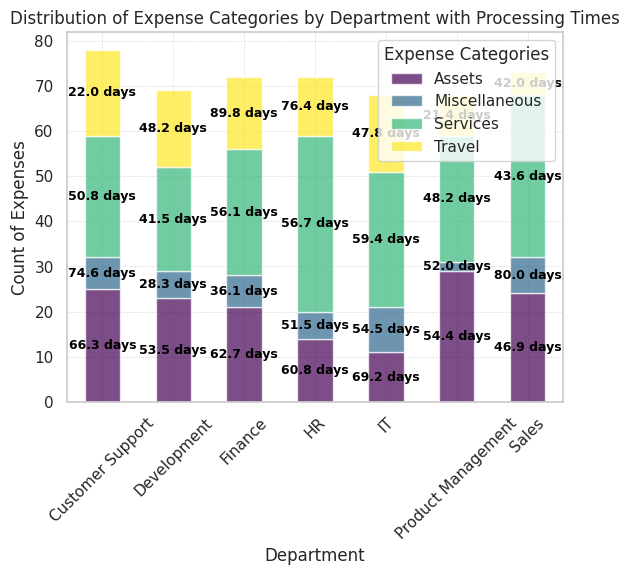

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'flag_data' contains 'department', 'category', and 'processing_period' columns
# Calculate processing period in days if not already calculated
flag_data['processed_date'] = pd.to_datetime(flag_data['processed_date'])
flag_data['opened_at'] = pd.to_datetime(flag_data['opened_at'])
flag_data['processing_period'] = (flag_data['processed_date'] - flag_data['opened_at']).dt.days
# make sure processing period is not negative, replace it 0
flag_data['processing_period'] = flag_data['processing_period'].apply(lambda x: 0.001 if x < 0 else x)

# Group data by department and category to count frequencies and calculate average processing time
category_counts = flag_data.groupby(['department', 'category']).size().reset_index(name='count')
category_processing_times = flag_data.groupby(['department', 'category'])['processing_period'].mean().reset_index()

# Merging counts with processing times for richer insights
category_data = pd.merge(category_counts, category_processing_times, on=['department', 'category'])

# Pivoting data for better visualization in stacked bar plot
pivot_data = category_data.pivot(index='department', columns='category', values='count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.7)
plt.title('Distribution of Expense Categories by Department with Processing Times')
plt.xlabel('Department')
plt.ylabel('Count of Expenses')
plt.xticks(rotation=45)
plt.legend(title='Expense Categories')

# Show mean processing times on bars for additional context
for n, x in enumerate([*pivot_data.index.values]):
    for (category, count), y in zip(pivot_data.loc[x].items(), pivot_data.loc[x].cumsum()):
        plt.text(n, y - (count / 2), f'{category_processing_times.loc[(category_processing_times["department"] == x) & (category_processing_times["category"] == category), "processing_period"].values[0]:.1f} days',
                 ha='center', va='center', color='black', fontweight='bold', fontsize=9)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


#### Generate JSON Description for the Insight

In [67]:
    {"data_type": "diagnostic",
    "insight": "Processing times vary across expense categories within departments",
    "insight_value": {
        "description": "The analysis reveals significant differences in processing times for various expense categories across departments. Travel expenses generally take longer to process, especially in IT and Product Management, while Assets and Miscellaneous expenses tend to have shorter processing times."
    },
    "plot": {
        "plot_type": "stacked bar",
        "title": "Distribution of Expense Categories by Department with Processing Times",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Development", "Finance", "HR", "IT", "Product Management", "Sales"],
            "description": "This axis categorizes expenses by department, highlighting variations in both the count and processing times of different expense categories."
        },
        "y_axis": {
            "name": "Count of Expenses",
            "value": "Number of expenses segmented by category",
            "description": "This axis displays the count of expenses by category within each department, annotated with the average processing times in days."
        },
        "description": "The stacked bar chart shows the distribution of expenses across different categories (Assets, Miscellaneous, Services, Travel) within each department. The processing times are annotated, revealing that Travel expenses often take the longest to process, whereas other categories such as Assets generally have shorter processing times. This suggests that certain types of expenses are more time-intensive to process, possibly due to additional verification requirements."
    },
    "question": "Which expense categories have the longest and shortest processing times within each department?",
    "actionable_insight": {
        "description": "The organization may consider streamlining the processes associated with Travel expenses, which show longer processing times across several departments, possibly by standardizing verification steps or implementing automation. Additionally, best practices from departments that handle similar expenses more quickly could be evaluated and adopted where applicable to improve processing times."
    }
}


{'data_type': 'diagnostic',
 'insight': 'Processing times vary across expense categories within departments',
 'insight_value': {'description': 'The analysis reveals significant differences in processing times for various expense categories across departments. Travel expenses generally take longer to process, especially in IT and Product Management, while Assets and Miscellaneous expenses tend to have shorter processing times.'},
 'plot': {'plot_type': 'stacked bar',
  'title': 'Distribution of Expense Categories by Department with Processing Times',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Development',
    'Finance',
    'HR',
    'IT',
    'Product Management',
    'Sales'],
   'description': 'This axis categorizes expenses by department, highlighting variations in both the count and processing times of different expense categories.'},
  'y_axis': {'name': 'Count of Expenses',
   'value': 'Number of expenses segmented by category',
   'description': '

### **Question 4:  Are there any specific brackets of amounts these expenses from the Development department fall into that could explain the faster processing?**


#### Processing Period by Expense Amount Brackets in Development Department

This visualization showcases how processing times vary across different expense amount-brackets within the Development department. The boxplot shows spread and median processing periods for each bracket, while the line graph overlays the proportion of total expenses falling within these brackets (for easy visualization). This dual-axis plot helps to understand if smaller or larger expense amounts correlate with quicker processing times and highlights distribution of expense magnitudes within the department.


/tmp/ipykernel_24955/1162767483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_expenses['amount_bracket'] = pd.cut(dev_expenses['amount'], bins=bins, labels=labels)
/tmp/ipykernel_24955/1162767483.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='amount_bracket', y='processing_period', data=dev_expenses, palette='coolwarm', ax=ax1)


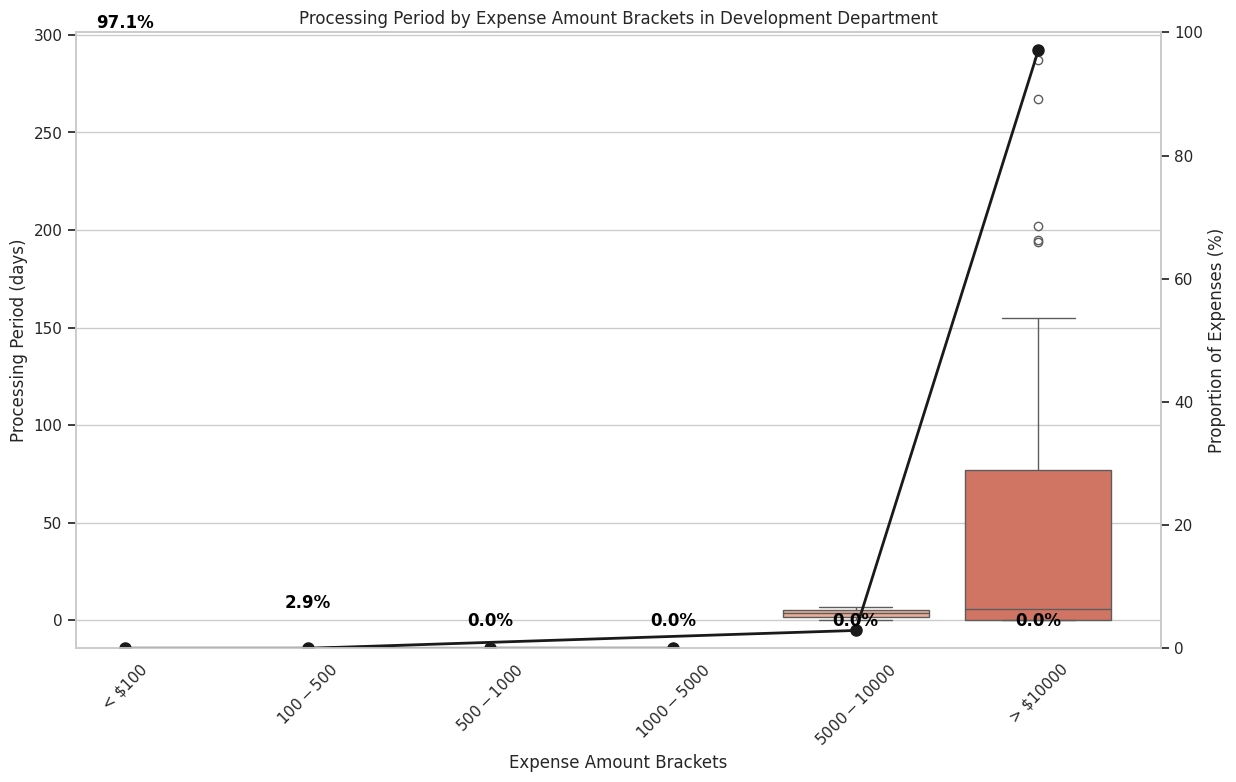

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'flag_data' contains 'department', 'amount', and 'processing_period' columns
# and is already loaded with the data

# Filter data to only include the Development department
dev_expenses = flag_data[flag_data['department'] == 'Development']

# Define the amount brackets
bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '$5000 - $10000', '> $10000']
dev_expenses['amount_bracket'] = pd.cut(dev_expenses['amount'], bins=bins, labels=labels)

# Calculate the proportion of expenses in each bracket
bracket_counts = dev_expenses['amount_bracket'].value_counts(normalize=True) * 100

# Create the box plot to visualize processing periods by amount brackets
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.boxplot(x='amount_bracket', y='processing_period', data=dev_expenses, palette='coolwarm', ax=ax1)
ax1.set_title('Processing Period by Expense Amount Brackets in Development Department')
ax1.set_xlabel('Expense Amount Brackets')
ax1.set_ylabel('Processing Period (days)')
ax1.tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Create a twin axis to show the proportion of expenses on the same plot
ax2 = ax1.twinx()
ax2.plot(bracket_counts.index, bracket_counts.values, color='k', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.set_ylabel('Proportion of Expenses (%)')
ax2.set_ylim(0, 100)  # Limit y-axis for proportion to 100%
ax2.grid(False)  # Turn off grid for the secondary axis to avoid visual clutter

# Adding annotations for proportions
for i, val in enumerate(bracket_counts.values):
    ax2.text(i, val + 3, f'{val:.1f}%', color='black', ha='center', va='bottom', fontweight='bold')

plt.show()


#### Generate JSON Description for the Insight

In [69]:
{
    "data_type": "diagnostic",
    "insight": "Lower expense brackets have faster processing times in the Development department",
    "insight_value": {
        "description": "Expenses under $100, which constitute a significant proportion of the submissions from the Development department, are processed almost immediately (0 days), contributing significantly to the department's overall faster processing times. In contrast, expenses between $100 and $500, while constituting a smaller proportion of submissions, take considerably longer (2 days)."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Processing Period by Expense Amount Brackets in Development Department",
        "x_axis": {
            "name": "Expense Amount Brackets",
            "value": ["< $100", "$100 - $500", "$500 - $1000", "$1000 - $5000", "$5000 - $10000", "> $10000"],
            "description": "This axis categorizes expenses into distinct brackets to illustrate how processing times vary with the amount of the expense."
        },
        "y_axis": {
            "name": "Processing Time (days)",
            "value": "Variable processing times",
            "description": "This axis displays the processing time required for each expense bracket, highlighting the trend of quicker processing for lower amounts."
        },
        "description": "The boxplot reveals a clear trend: lower expense amounts are processed more rapidly, contributing to the Development department's overall efficiency. The immediate processing of the smallest expense bracket, which makes up a significant proportion of submissions, significantly lowers the average processing time for the department."
    },
    "question": "Are there any specific brackets of amounts these expenses from the Development department fall into that could explain the faster processing?",
    "actionable_insight": {
        "description": "Understanding that lower expense amounts are processed more quickly suggests that the Development department may be benefiting from streamlined approval processes for smaller amounts. To leverage this efficiency, other departments might consider adopting similar streamlined processes for lower-cost expenses. Additionally, investigating why expenses in the $100-$500 bracket take longer to process could help in identifying bottlenecks and implementing solutions to enhance processing times across all brackets."
    }
}

{'data_type': 'diagnostic',
 'insight': 'Lower expense brackets have faster processing times in the Development department',
 'insight_value': {'description': "Expenses under $100, which constitute a significant proportion of the submissions from the Development department, are processed almost immediately (0 days), contributing significantly to the department's overall faster processing times. In contrast, expenses between $100 and $500, while constituting a smaller proportion of submissions, take considerably longer (2 days)."},
 'plot': {'plot_type': 'boxplot',
  'title': 'Processing Period by Expense Amount Brackets in Development Department',
  'x_axis': {'name': 'Expense Amount Brackets',
   'value': ['< $100',
    '$100 - $500',
    '$500 - $1000',
    '$1000 - $5000',
    '$5000 - $10000',
    '> $10000'],
   'description': 'This axis categorizes expenses into distinct brackets to illustrate how processing times vary with the amount of the expense.'},
  'y_axis': {'name': 'Proc

**Question 5: Can the efficient practices from this department be implemented in other departments to standardize processing times?**


The Development department demonstrates a highly efficient process for handling low-cost expenses, which are processed almost instantaneously. This approach could serve as a model for other departments experiencing slower processing times.

To improve overall expense processing efficiency across the organization, it is recommended to analyze and potentially adopt the streamlined procedures used by the Development department for managing low-cost expenses. This could involve simplifying approval protocols for small amounts, enhancing the use of automation tools, or providing additional training to ensure all departments handle expenses under a certain threshold with similar speed and efficiency. Conducting pilot implementations in departments with the longest processing times could provide valuable data on the impact of these changes and help refine the approach before a wider rollout. Additionally, regular review sessions to assess the effectiveness of these new practices should be established to ensure they meet the organization’s financial control standards and operational goals.

### **Summary of Findings (Flag 40):**

1. **Departmental Analysis:** This dataset delves into the expense processing times across different departments, highlighting significant variances in efficiency. The focus is on understanding why certain departments, like Development, process expenses faster than others such as HR, which experiences notably longer processing times.

2. **Keyword Impact on Expense Amounts:** The dataset reveals that specific keywords in expense short descriptions, such as 'Travel' and 'Cloud', are associated with higher amounts, while keywords like 'Service' correlate with lower amounts. This relationship highlights the influence of descriptive language on expense values and can be crucial for better budgeting and resource management.

3. **Operational Insights and Processing Times:** Through analyzing expense submissions and their processing times, this dataset provides insights into operational practices that could potentially be optimized or adjusted to enhance overall efficiency in processing times across the board. This includes the identification of categories with consistently high amounts for potential workflow adjustments to improve financial control and oversight.
